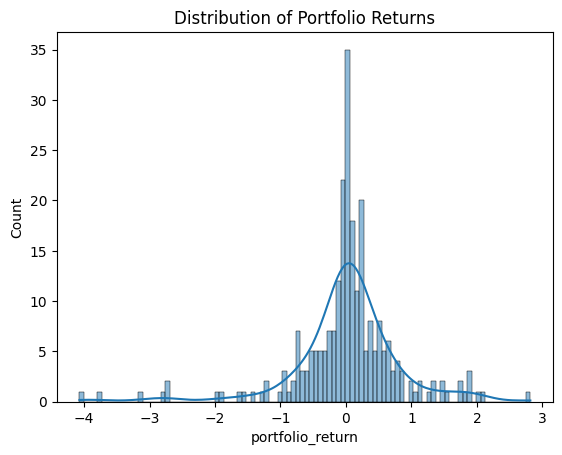

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv("data/backtest_curves/portfolio_equity_curve.csv")
df["cumulative_return"] = np.exp(np.cumsum(df["portfolio_return"])) - 1

sns.histplot(df["portfolio_return"], bins=100, kde=True)
plt.title("Distribution of Portfolio Returns")
plt.show()

In [7]:
MAX_RETURN = 0.1
df["portfolio_return_clipped"] = df["portfolio_return"].clip(lower=-MAX_RETURN, upper=MAX_RETURN)

In [8]:
import numpy as np

returns = df["portfolio_return_clipped"].values
sharpe = (returns.mean() / returns.std()) * np.sqrt(252)
mdd = ((np.maximum.accumulate(np.exp(np.cumsum(returns))) - np.exp(np.cumsum(returns))) / 
       np.maximum.accumulate(np.exp(np.cumsum(returns)))).max()
cum_return = np.exp(np.sum(returns)) - 1

print(f"Sharpe Ratio      : {sharpe:.4f}")
print(f"Max Drawdown      : {mdd:.4f}")
print(f"Cumulative Return : {cum_return:.4f}")

Sharpe Ratio      : 2.0431
Max Drawdown      : 0.6464
Cumulative Return : 16.4724


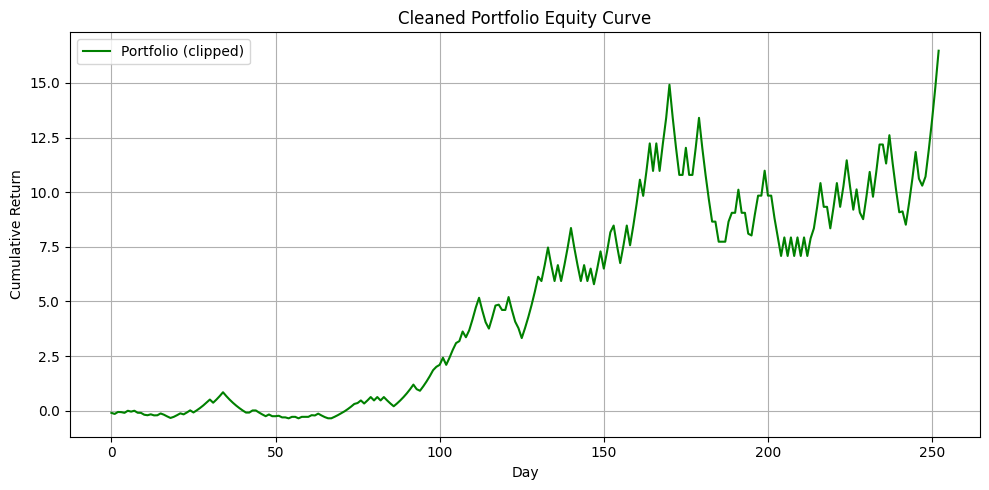

In [9]:
df["cumulative_return_clipped"] = np.exp(np.cumsum(df["portfolio_return_clipped"])) - 1

plt.figure(figsize=(10, 5))
plt.plot(df["cumulative_return_clipped"], label="Portfolio (clipped)", color="green")
plt.title("Cleaned Portfolio Equity Curve")
plt.xlabel("Day")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

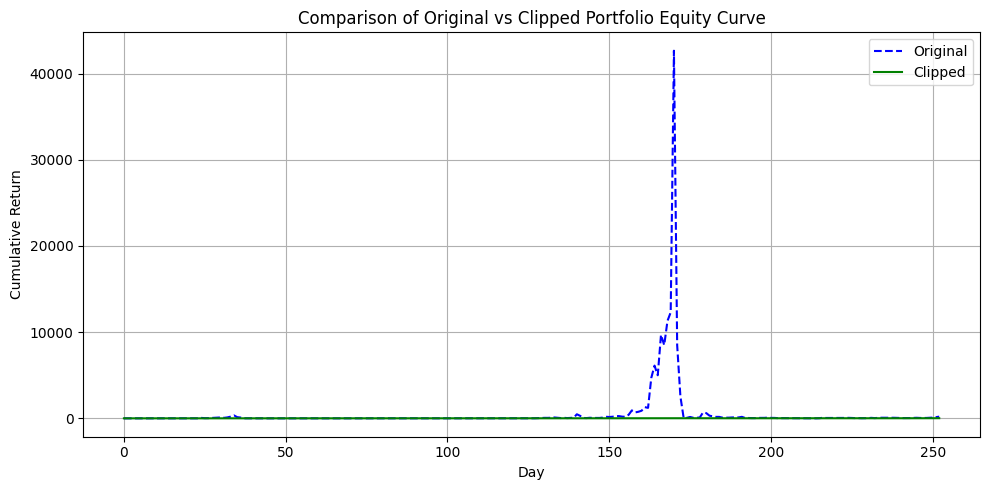

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df["cumulative_return"], label="Original", color="blue", linestyle="--")
plt.plot(df["cumulative_return_clipped"], label="Clipped", color="green")
plt.title("Comparison of Original vs Clipped Portfolio Equity Curve")
plt.xlabel("Day")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
var_95 = np.percentile(df["portfolio_return_clipped"], 5)
print(f"Value at Risk (95%): {var_95:.4f}")

Value at Risk (95%): -0.1000


df['portfolio_return_clipped'] = df['portfolio_return'].clip(lower=-0.1, upper=0.1)
df.to_csv("data/backtest_curves/portfolio_equity_curve_with_clip.csv", index=False)

# All tickers

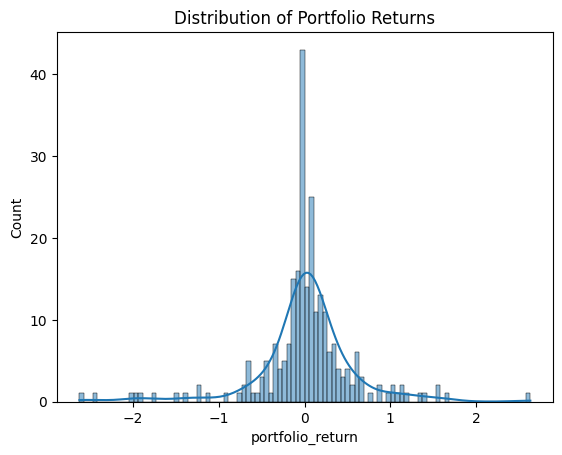

In [12]:
df = pd.read_csv("data/backtest_curves/all_tickers_portfolio_equity_curve.csv")
df["cumulative_return"] = np.exp(np.cumsum(df["portfolio_return"])) - 1

sns.histplot(df["portfolio_return"], bins=100, kde=True)
plt.title("Distribution of Portfolio Returns")
plt.show()

In [13]:
MAX_RETURN = 0.1
df["portfolio_return_clipped"] = df["portfolio_return"].clip(lower=-MAX_RETURN, upper=MAX_RETURN)

In [14]:
returns = df["portfolio_return_clipped"].values
sharpe = (returns.mean() / returns.std()) * np.sqrt(252)
mdd = ((np.maximum.accumulate(np.exp(np.cumsum(returns))) - np.exp(np.cumsum(returns))) / 
       np.maximum.accumulate(np.exp(np.cumsum(returns)))).max()
cum_return = np.exp(np.sum(returns)) - 1

print(f"Sharpe Ratio      : {sharpe:.4f}")
print(f"Max Drawdown      : {mdd:.4f}")
print(f"Cumulative Return : {cum_return:.4f}")

Sharpe Ratio      : 2.1921
Max Drawdown      : 0.5971
Cumulative Return : 18.1426


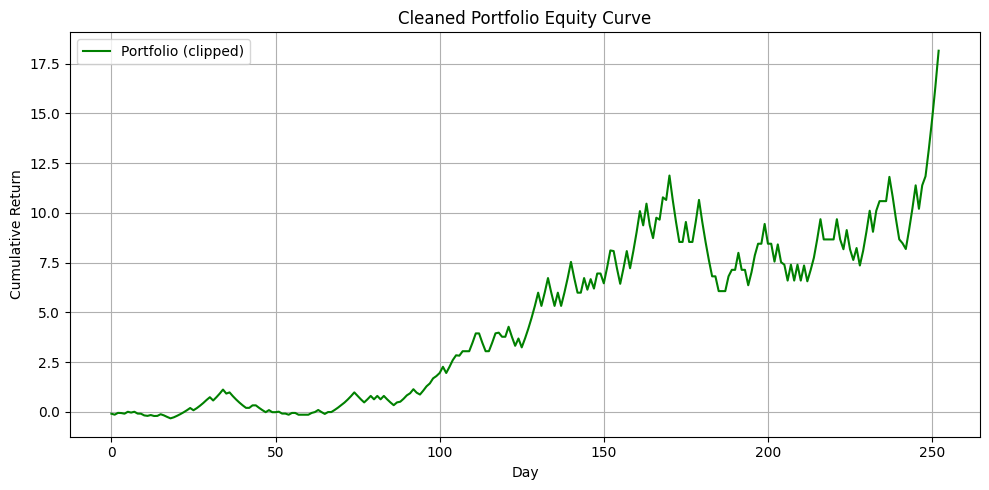

In [15]:
df["cumulative_return_clipped"] = np.exp(np.cumsum(df["portfolio_return_clipped"])) - 1

plt.figure(figsize=(10, 5))
plt.plot(df["cumulative_return_clipped"], label="Portfolio (clipped)", color="green")
plt.title("Cleaned Portfolio Equity Curve")
plt.xlabel("Day")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

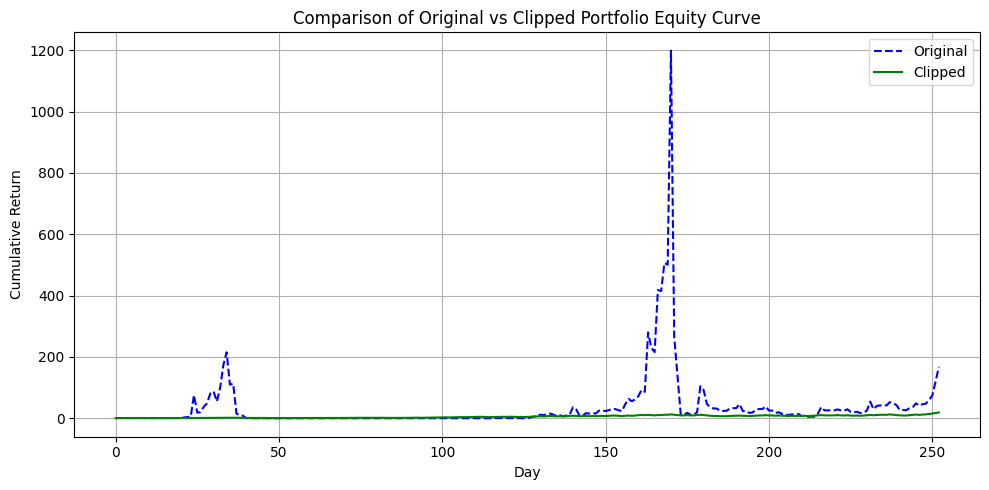

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(df["cumulative_return"], label="Original", color="blue", linestyle="--")
plt.plot(df["cumulative_return_clipped"], label="Clipped", color="green")
plt.title("Comparison of Original vs Clipped Portfolio Equity Curve")
plt.xlabel("Day")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()